Nama : Mega Dwi Rengganis<br>
NIM : 211351081<BR>
Kelas : Teknik Informatika Pagi Afrom google.colab import files
files.upload()

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"megaegol05","key":"8784d7db866daef6acd0d2a0f7e37c72"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d kukuroo3/body-signal-of-smoking

Dataset URL: https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking
License(s): CC0-1.0
  0% 0.00/3.40M [00:00<?, ?B/s]
100% 3.40M/3.40M [00:00<00:00, 139MB/s]


In [ ]:
!unzip body-signal-of-smoking.zip -d body-signal-of-smoking
!ls body-signal-of-smoking

Archive:  body-signal-of-smoking.zip
  inflating: body-signal-of-smoking/competition_format/x_test.csv  
  inflating: body-signal-of-smoking/competition_format/x_train.csv  
  inflating: body-signal-of-smoking/competition_format/y_test.csv  
  inflating: body-signal-of-smoking/competition_format/y_train.csv  
  inflating: body-signal-of-smoking/smoking.csv  
competition_format  smoking.csv


# import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# load dataset dalam variabel df

Dataset ini berisi rangkuman kondisi kesehatan dan status perokok/tidak yang didapatkan melalui aktivitas medical checkup.

Atribut yang terdapat didalam dataset ini:
- ID : serial number given to a person.
- gender: the gender of a person being either female(0) or male(1).
- age : 5-years gap age groups.
- height(cm)
- weight(kg)
- waist(cm) : Waist circumference length
- eyesight(left): Denoted by a value between 0.1-2.5, or 9.9
- eyesight(right): Denoted by a value between 0.1-2.5, or 9.9
- hearing(left): hearing of the person's ear (1 - normal, 2 - abnormal)
- hearing(right): hearing of the person's ear (1 - normal, 2 - abnormal)
- systolic : blood pressure.
- relaxation : blood pressure.
- fasting blood sugar: blood sugar before meals level
- Cholesterol : total
- triglyceride
- HDL : cholesterol type
- LDL : cholesterol type
- hemoglobin
- Urine protein
- serum creatinine
- AST : glutamic oxaloacetic transaminase type
- ALT : glutamic oxaloacetic transaminase type
- Gtp : γ-GTP
- oral : Oral Examination status (s whether the examinee accepted the oral examination).
- dental caries
- tartar : tartar status
- smoking: smoking status of a person (1 - smoking, 0 - non-smoking)

In [ ]:
df = pd.read_csv('/smoking-df.csv')

In [ ]:
df.head()

Unnamed: 0  ID  gender  age  height  weight  waist  eyesight_left  \
0           0   0       0   40     155      60   81.3            1.2   
1           1   1       0   40     160      60   81.0            0.8   
2           2   2       1   55     170      60   80.0            0.8   
3           3   3       1   40     165      70   88.0            1.5   
4           4   4       0   40     155      60   86.0            1.0   

   eyesight_right  hearing_left  ...  hemoglobin  urine_protein  \
0             1.0           1.0  ...        12.9            1.0   
1             0.6           1.0  ...        12.7            1.0   
2             0.8           1.0  ...        15.8            1.0   
3             1.5           1.0  ...        14.7            1.0   
4             1.0           1.0  ...        12.5            1.0   

   serum_creatinine   ast   alt   gtp  oral  dental_caries  tartar  smoking  
0               0.7  18.0  19.0  27.0     1              0       1        0  
1               0.6  22.0  19.0  18.0     1              0       1        0  
2               1.0  21.0  16.0  22.0     1              0       0        1  
3               1.0  19.0  26.0  18.0     1              0       1        0  
4               0.6  16.0  14.0  22.0     1              0       0        0  

[5 rows x 28 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           55692 non-null  int64  
 1   ID                   55692 non-null  int64  
 2   gender               55692 non-null  int64  
 3   age                  55692 non-null  int64  
 4   height               55692 non-null  int64  
 5   weight               55692 non-null  int64  
 6   waist                55692 non-null  float64
 7   eyesight_left        55692 non-null  float64
 8   eyesight_right       55692 non-null  float64
 9   hearing_left         55692 non-null  float64
 10  hearing_right        55692 non-null  float64
 11  systolic             55692 non-null  float64
 12  relaxation           55692 non-null  float64
 13  fasting_blood_sugar  55692 non-null  float64
 14  cholesterol          55692 non-null  float64
 15  triglyceride         55692 non-null 

# Melihat korelasi antar kolom untuk mengambil fitur

<Axes: >

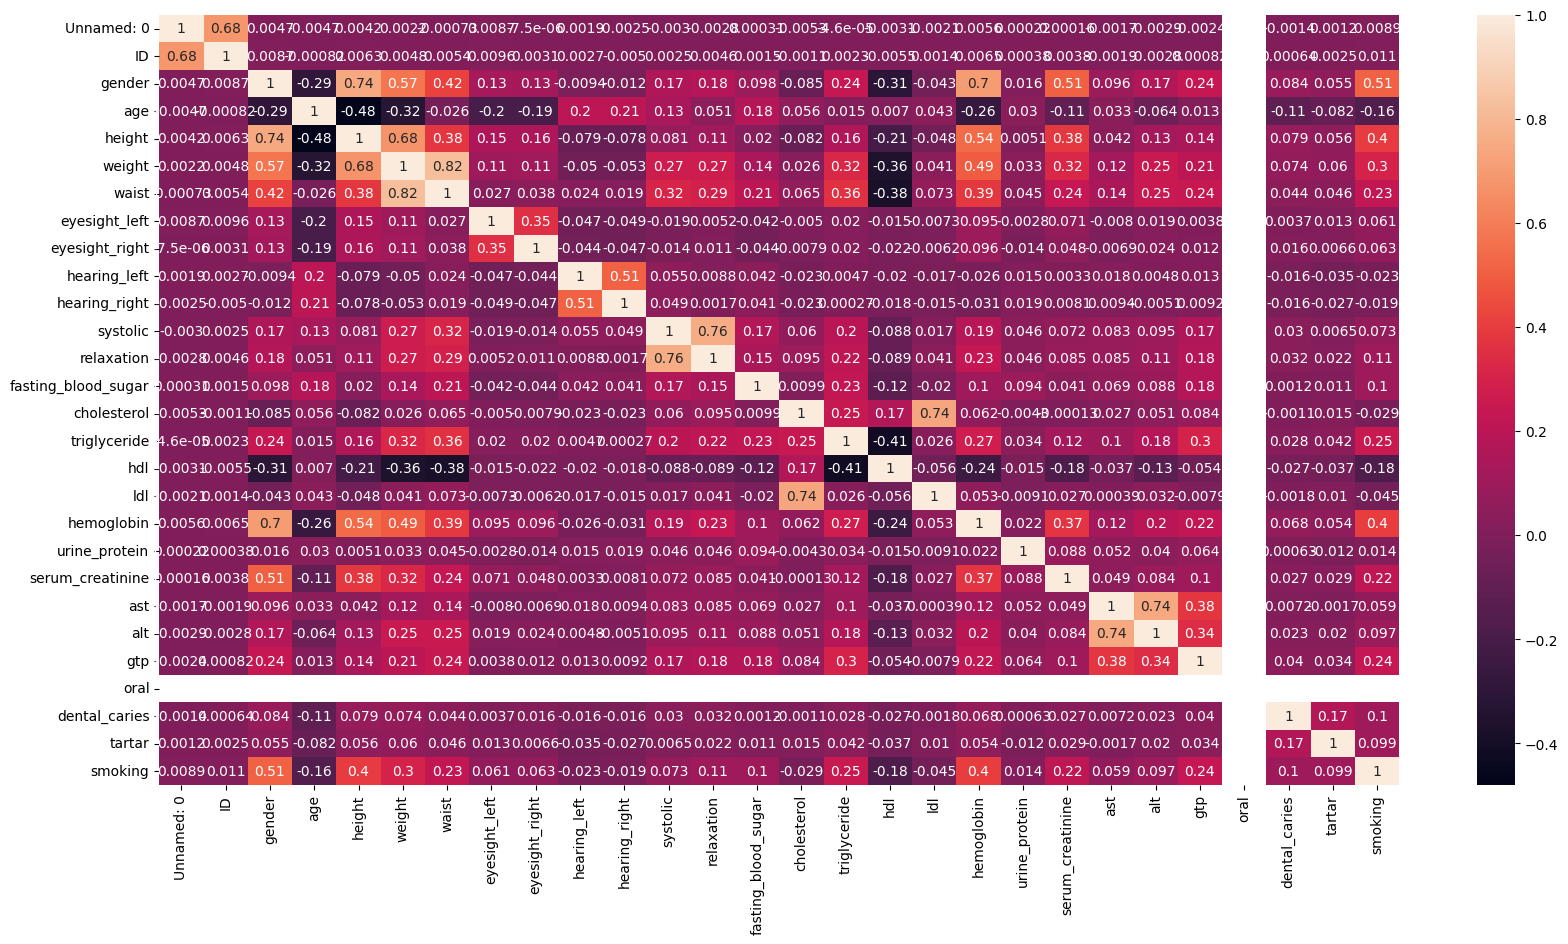

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
correlation_matrix = df.corr()
correlations_with_target = correlation_matrix['smoking'].sort_values(ascending=False)
correlations_with_target.drop('smoking').to_frame()

smoking
gender               0.510340
hemoglobin           0.400678
height               0.396675
weight               0.302780
triglyceride         0.251799
gtp                  0.236619
waist                0.226259
serum_creatinine     0.216812
relaxation           0.108309
dental_caries        0.103857
fasting_blood_sugar  0.100279
tartar               0.098655
alt                  0.097338
systolic             0.073109
eyesight_right       0.063017
eyesight_left        0.061204
ast                  0.059253
urine_protein        0.014267
ID                   0.011476
Unnamed: 0           0.008866
hearing_right       -0.018855
hearing_left        -0.023209
cholesterol         -0.028548
ldl                 -0.045220
age                 -0.162557
hdl                 -0.178470
oral                      NaN

kolom yang memiliki korelasi paling tinggi dengan kolom smoking adalah:
- gender yang berisi data kelamin pasien
- hemogoblin yang berisi data kadar hemogoblin pada pasien
- height yaitu tinggi pasien
- weight yaitu berat pasien
- triglyceride atau kadar lemak pada darah
- gtp yaitu jumlah gtp pada pasien
- waist yaitu lingkar pinggang pasien
- serum_creatinine yaitu kadar kreatinin pada pasein

# Membuat variabel fitur dan target

In [ ]:
features = ['gender','hemoglobin','height','weight','triglyceride','gtp','waist','serum_creatinine']
x = df[features].values
y = df['smoking'].values
x.shape, y.shape

((55692, 8), (55692,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(55692, 8) (44553, 8) (11139, 8)


In [ ]:
print(y.shape, y_train.shape, y_test.shape)

(55692,) (44553,) (11139,)


# Membuat model ANN
ANN (Artificial Neural Network) atau Jaringan Saraf Tiruan adalah salah satu metode dalam machine learning yang memiliki sejumlah unit pemrosesan sederhana yang disebut neuron. Dalam ANN terdapat 3 macam layer yaitu:
- Lapisan Input: Lapisan pertama yang menerima data mentah dari luar.
- Lapisan Tersembunyi (Hidden Layers): Lapisan-lapisan di antara input dan output yang melakukan pemrosesan utama.
- Lapisan Output: Lapisan terakhir yang menghasilkan hasil dari jaringan.

In [ ]:
model = Sequential([
  layers.Dense(8, activation='relu', input_dim=x.shape[-1]),
  layers.Dense(16, activation='relu'),
  layers.Dense(2, activation='softmax')
])

Dalam membangun ANN, kita menggunakan lapisan/layer dense adalah lapisan di mana setiap neuron terhubung dengan semua neuron di lapisan sebelumnya dan semua neuron di lapisan berikutnya.
- Pada lapisan pertama kita menggunakan layer dense dengan jumlah neuron 8 dengan aktivasi relu, relu sendiri merupakan aktivasi yang menghasilkan nilai 0 jika input kurang dari 0, dan nilai input itu sendiri jika input lebih besar dari 0.
- Pada lapisan kedua, kita menggunakan layer dense dengan jumlah neuron sebanyak 16 dengan aktivasi yang sama yaitu relu.
- Pada lapisan ketiga, kita menggunnakan layer dense dengan jumlah neuron sebanyak jumlah unique data pada kolom smoking yaitu 2 (1/0) menggunakan ativasi softmax, aktivasi softmax merupakan aktivasi yang mengubah output dari jaringan menjadi distribusi probabilitas, di mana total dari semua probabilitas adalah 1.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 250 (1000.00 Byte)
Trainable params: 250 (1000.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model dilatih dengan jumlah epoch sebanyak 15 dan batch size sebanyak 1

In [ ]:
epochs=15
history = model.fit(
  x_train,
  y_train,
  batch_size=1,
  shuffle=True,
  verbose=1,
  epochs=epochs
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


44553/44553 [==============================] - 122s 3ms/step - loss: 0.6257 - accuracy: 0.6821
Epoch 2/15
44553/44553 [==============================] - 119s 3ms/step - loss: 0.5085 - accuracy: 0.7094
Epoch 3/15
44553/44553 [==============================] - 120s 3ms/step - loss: 0.5002 - accuracy: 0.7202
Epoch 4/15
44553/44553 [==============================] - 121s 3ms/step - loss: 0.4973 - accuracy: 0.7266
Epoch 5/15
44553/44553 [==============================] - 122s 3ms/step - loss: 0.4957 - accuracy: 0.7249
Epoch 6/15
44553/44553 [==============================] - 124s 3ms/step - loss: 0.4958 - accuracy: 0.7248
Epoch 7/15
44553/44553 [==============================] - 120s 3ms/step - loss: 0.4962 - accuracy: 0.7219
Epoch 8/15
44553/44553 [==============================] - 120s 3ms/step - loss: 0.4954 - accuracy: 0.7229
Epoch 9/15
44553/44553 [==============================] - 119s 3ms/step - loss: 0.4949 - accuracy: 0.7213
Epoch 10/15
44553/44553 [==============================] 

# grafik dari performa model

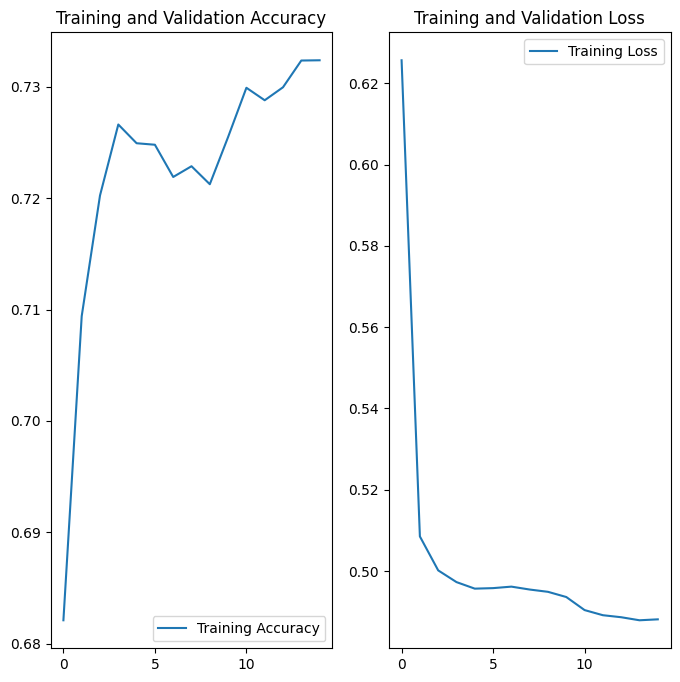

In [ ]:
acc = history.history['accuracy']

loss = history.history['loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Akurasi skor model

In [ ]:
from sklearn.metrics import accuracy_score
pred = np.argmax(model.predict(x_test), axis=1)
print(accuracy_score(y_test, pred))

349/349 [==============================] - 1s 3ms/step
0.7427058084208636


In [ ]:
class_name=['Perokok', 'Bukan Perokok']

In [ ]:
x

array([[  0. ,  12.9, 155. , ...,  27. ,  81.3,   0.7],
       [  0. ,  12.7, 160. , ...,  18. ,  81. ,   0.6],
       [  1. ,  15.8, 170. , ...,  22. ,  80. ,   1. ],
       ...,
       [  0. ,  12.4, 160. , ...,  12. ,  68.5,   0.5],
       [  1. ,  14.4, 165. , ...,  18. ,  78. ,   0.7],
       [  1. ,  15. , 160. , ...,  41. ,  85. ,   0.8]])

In [ ]:
print(x)

[[  0.   12.9 155.  ...  27.   81.3   0.7]
 [  0.   12.7 160.  ...  18.   81.    0.6]
 [  1.   15.8 170.  ...  22.   80.    1. ]
 ...
 [  0.   12.4 160.  ...  12.   68.5   0.5]
 [  1.   14.4 165.  ...  18.   78.    0.7]
 [  1.   15.  160.  ...  41.   85.    0.8]]


In [ ]:
a = [1,12.9,155,1,1,0,1,1]
a = np.array(a) # convert to a numpy array
a = np.expand_dims(a, 0) # change shape from (8,) to (1,8)

predictions = model.predict(a)
score = tf.nn.softmax(predictions[0])

print(
    "Hasil diagnosa bahwa pasien adalah {} dengan akurasi {:.2f} %."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)
#model.predict(a) # voila!

1/1 [==============================] - 0s 29ms/step
Hasil diagnosa bahwa pasien adalah Bukan Perokok dengan akurasi 61.86 %.


# Save model dalam format tf.lite

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model_smoking.tflite", "wb") as f:
  f.write(tflite_model)

In [ ]:
print("Tensorflow versi: "+tf.__version__)

Tensorflow versi: 2.15.0
